# Haario-Bardenet AC

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from plotnine import *
import pandas as pd
from utils import (run_replicates, ecdf_norm_plotter)

import pints
import pints.toy
import pints.plot
from pints.functionaltests.haario_bardenet_acmc import (test_haario_bardenet_acmc_on_banana,
                                                        test_haario_bardenet_acmc_on_two_dim_gaussian,
                                                        test_haario_bardenet_acmc_on_correlated_gaussian,
                                                        test_haario_bardenet_acmc_on_annulus)

# Two dimensional Gaussian

/usr/local/lib/python3.7/site-packages/plotnine/facets/facet.py:552: PlotnineWarning: If you need more space for the x-axis tick text use ... + theme(subplots_adjust={'wspace': 0.25}). Choose an appropriate value for 'wspace'.


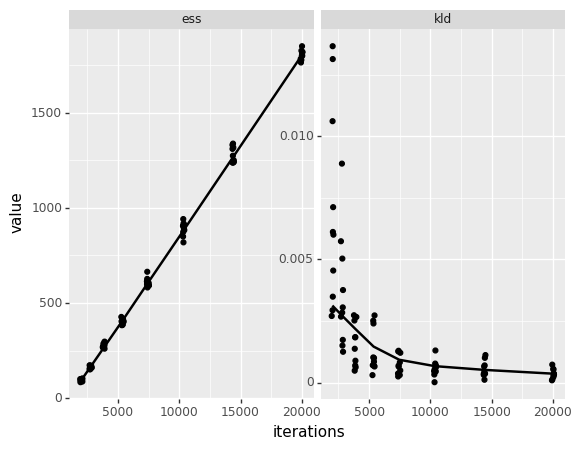

<ggplot: (346625325)>

In [4]:
low = np.log10(2000)
high = np.log10(20000)
test = run_replicates(10**np.linspace(low, high, 8), 10, test_haario_bardenet_acmc_on_two_dim_gaussian)

df = pd.melt(test, id_vars=['iterations', 'replicate'])
(ggplot(df,
        aes(x='iterations', y='value')) +
 geom_jitter(width=100) +
 geom_smooth(stat='smooth', se=False) +
 facet_wrap('variable', scales='free'))

The ESS and KLD both trend in the correct directions.

Show example run results.

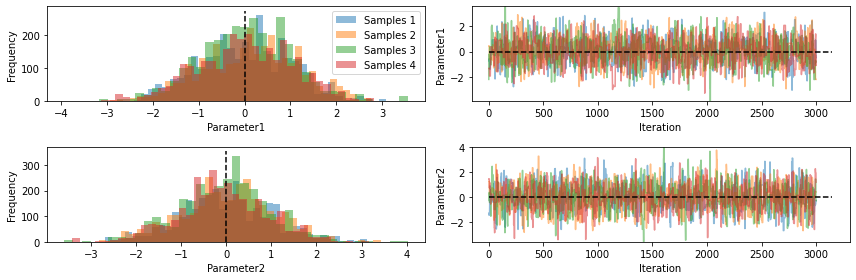

param    mean    std.    2.5%    25%    50%    75%    97.5%    rhat    ess      ess per sec.
-------  ------  ------  ------  -----  -----  -----  -------  ------  -------  --------------
param 1  0.06    1.03    -1.93   -0.65  0.08   0.80   2.06     1.00    1234.06  237.65
param 2  -0.01   1.00    -2.00   -0.63  0.00   0.65   1.95     1.00    1191.33  229.42


In [5]:
n_chains = 4
n_iterations = 4000
n_warmup = 1000
log_pdf = pints.toy.GaussianLogPDF(mean=[0, 0], sigma=[1, 1])

# Get initial parameters
log_prior = pints.ComposedLogPrior(
    pints.GaussianLogPrior(mean=0, sd=10),
    pints.GaussianLogPrior(mean=0, sd=10))
x0 = log_prior.sample(n=n_chains)
controller = pints.MCMCController(
            log_pdf, n_chains, x0, sigma0=None, method=pints.HaarioBardenetACMC)
controller.set_max_iterations(n_iterations)
controller.set_log_to_screen(False)
chains = controller.run()
chains = chains[:, n_warmup:]

# Show traces and histograms
pints.plot.trace(chains, ref_parameters=[0, 0])

# Show graphs
plt.show()

results = pints.MCMCSummary(chains=chains, time=controller.time())
print(results)

The parameters are close to their true means. How do they compare to MCMC eCDFs compare with the theoretical? Look pretty good.

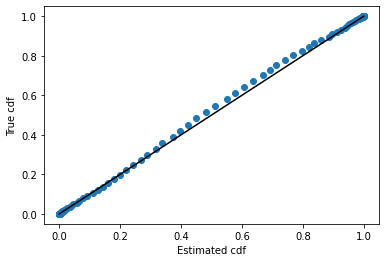

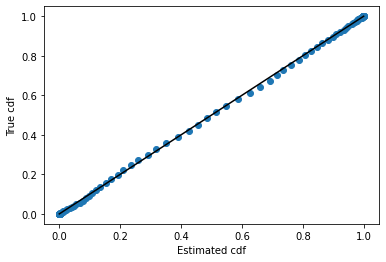

[None, None]

In [49]:
draws = np.vstack(chains)
[ecdf_norm_plotter(draws[:, i], 1) for i in range(2)]

# Correlated Gaussian

/usr/local/lib/python3.7/site-packages/plotnine/facets/facet.py:552: PlotnineWarning: If you need more space for the x-axis tick text use ... + theme(subplots_adjust={'wspace': 0.25}). Choose an appropriate value for 'wspace'.


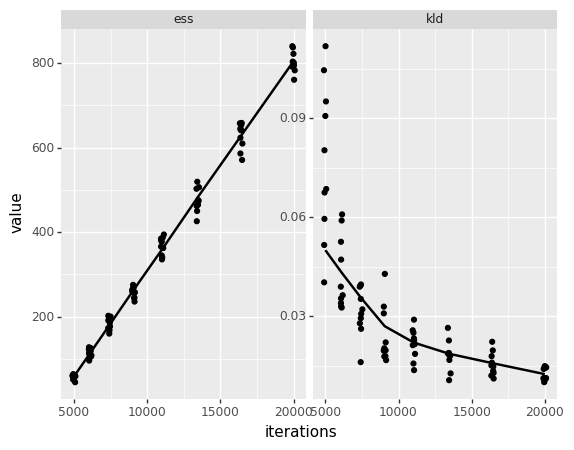

<ggplot: (349504573)>

In [5]:
low = np.log10(5000)
high = np.log10(20000)
test = run_replicates(10**np.linspace(low, high, 8), 10, test_haario_bardenet_acmc_on_correlated_gaussian)

df = pd.melt(test, id_vars=['iterations', 'replicate'])
(ggplot(df,
        aes(x='iterations', y='value')) +
 geom_jitter(width=100) +
 geom_smooth(stat='smooth', se=False) +
 facet_wrap('variable', scales='free'))

Example run of results.

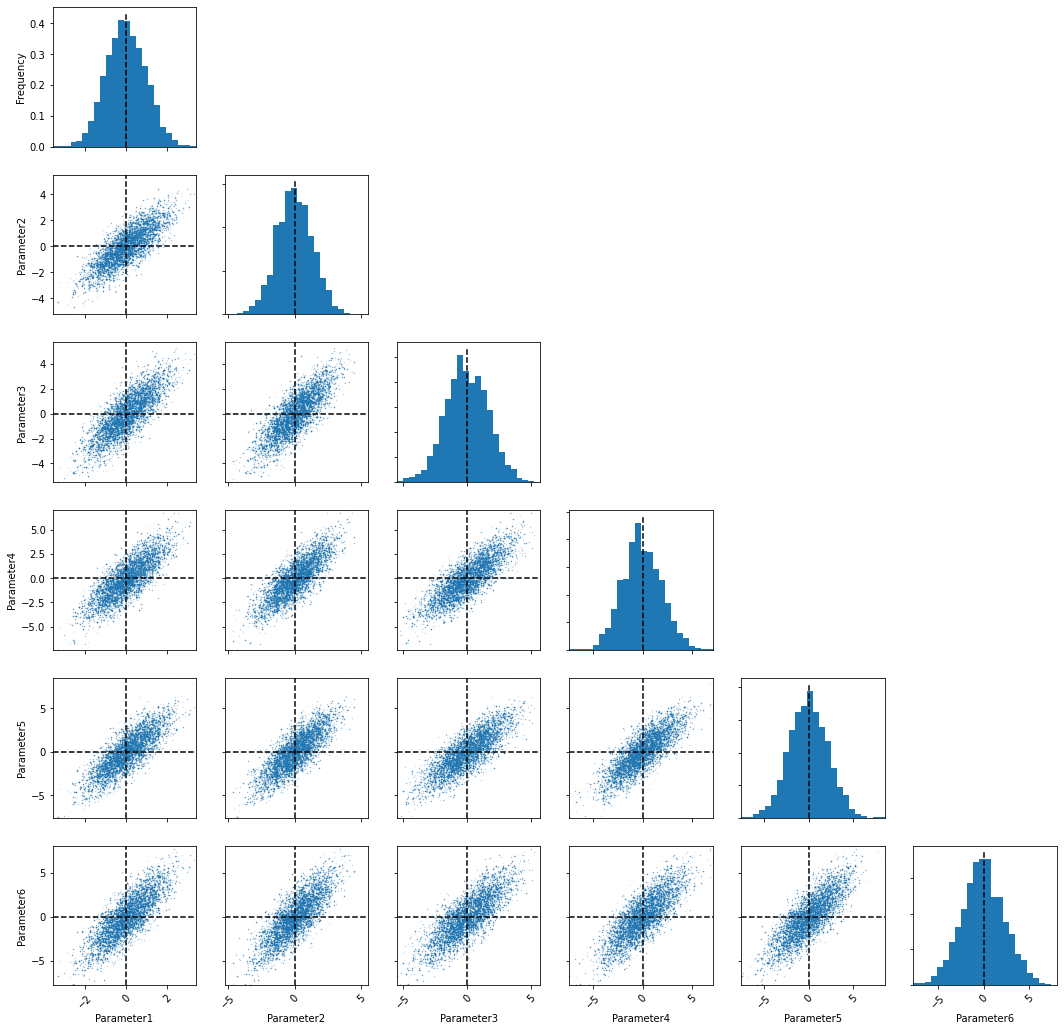

param    mean    std.    2.5%    25%    50%    75%    97.5%    rhat    ess      ess per sec.
-------  ------  ------  ------  -----  -----  -----  -------  ------  -------  --------------
param 1  0.00    0.96    -1.84   -0.66  0.00   0.68   1.86     1.01    998.20   90.28
param 2  -0.00   1.36    -2.65   -0.94  -0.02  0.93   2.60     1.01    948.35   85.77
param 3  -0.05   1.65    -3.26   -1.19  -0.08  1.12   3.21     1.00    954.86   86.36
param 4  -0.07   1.94    -3.80   -1.35  -0.19  1.21   3.82     1.00    917.63   82.99
param 5  -0.04   2.12    -4.19   -1.49  -0.08  1.44   4.16     1.00    1001.02  90.53
param 6  -0.04   2.36    -4.73   -1.61  -0.10  1.54   4.65     1.00    1003.47  90.75


In [50]:
n_chains = 4
n_iterations = 8000
n_warmup = 4000

log_pdf = pints.toy.HighDimensionalGaussianLogPDF(dimension=6, rho=0.8)
x0 = np.random.uniform(-4, 4, size=(n_chains, 6))
controller = pints.MCMCController(
            log_pdf, n_chains, x0, sigma0=None, method=pints.HaarioBardenetACMC)
controller.set_max_iterations(n_iterations)
controller.set_log_to_screen(False)
chains = controller.run()
chains = chains[:, n_warmup:]

# Show traces and histograms
pints.plot.pairwise(np.vstack(chains), kde=False, ref_parameters=([0] * 6))

# Show graphs
plt.show()

results = pints.MCMCSummary(chains=chains, time=controller.time())
print(results)

Again the estimated means compare well with the theoretical. Now comparing the theoretical and empirical cdfs: again, these look fine.

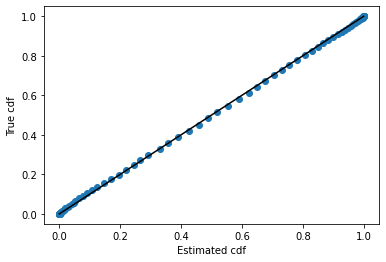

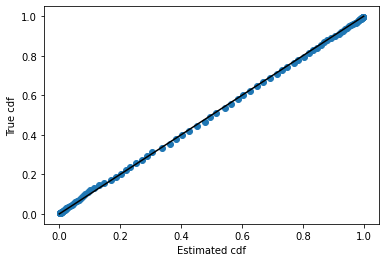

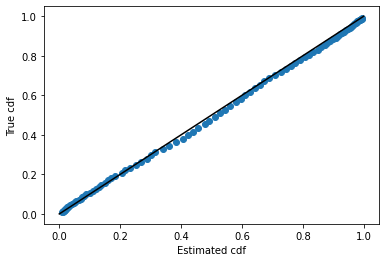

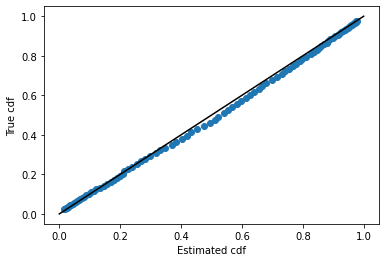

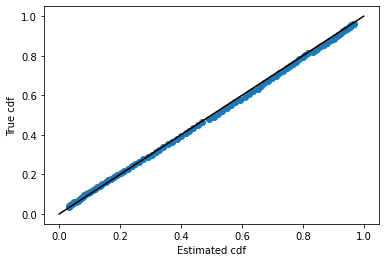

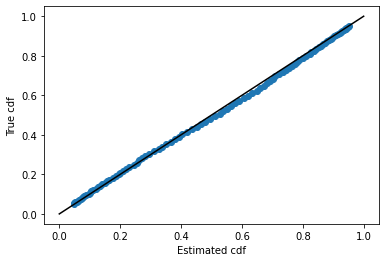

[None, None, None, None, None, None]

In [58]:
draws = np.vstack(chains)
[ecdf_norm_plotter(draws[:, i], np.sqrt(i + 1)) for i in range(6)]

# Banana

/usr/local/lib/python3.7/site-packages/plotnine/facets/facet.py:552: PlotnineWarning: If you need more space for the x-axis tick text use ... + theme(subplots_adjust={'wspace': 0.25}). Choose an appropriate value for 'wspace'.


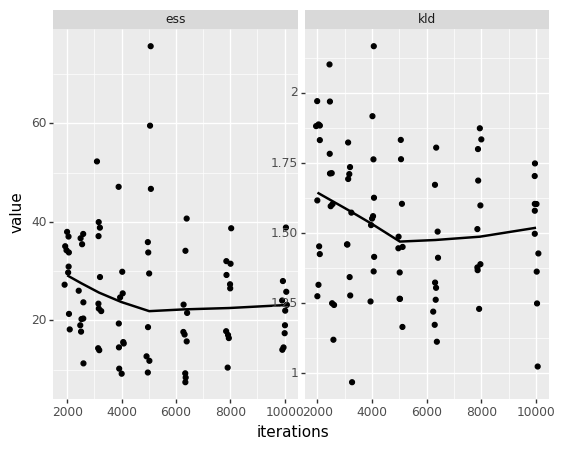

<ggplot: (282371377)>

In [6]:
low = np.log10(2000)
high = np.log10(10000)
test = run_replicates(10**np.linspace(low, high, 8), 10, test_haario_bardenet_acmc_on_banana)

df = pd.melt(test, id_vars=['iterations', 'replicate'])
(ggplot(df,
        aes(x='iterations', y='value')) +
 geom_jitter(width=100) +
 geom_smooth(stat='smooth', se=False) +
 facet_wrap('variable', scales='free'))

The banana is a hard problem. Because of this, both the ESS and KLD do not behave well. It's likely that this is due to the problem being too hard for Haario-Bardenet, rather than there being an issue with the method itself.

Example run of results.

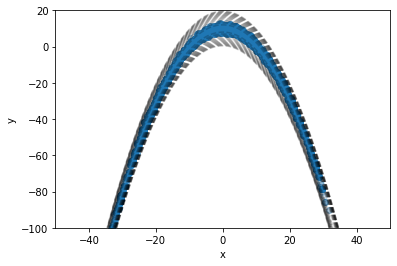

In [31]:
n_chains = 4
n_iterations = 4000
n_warmup = 1000

log_pdf = pints.toy.TwistedGaussianLogPDF(dimension=2, b=0.1)
log_prior = pints.MultivariateGaussianLogPrior([0, 0],
                                               [[10, 0], [0, 10]])
x0 = log_prior.sample(n_chains)
sigma0 = np.diag(np.array([1, 3]))

levels = np.linspace(-50, -1, 20)
x = np.linspace(-50, 50, 250)
y = np.linspace(-100, 20, 250)
X, Y = np.meshgrid(x, y)
Z = [[log_pdf([i, j]) for i in x] for j in y]

# run model
controller = pints.MCMCController(
            log_pdf, n_chains, x0, sigma0=None, method=pints.HaarioBardenetACMC)
controller.set_max_iterations(n_iterations)
controller.set_log_to_screen(False)
chains = controller.run()
chains = np.vstack(chains[:, n_warmup:])

plt.contour(X, Y, Z, levels=levels, colors='k', alpha=0.2)
plt.scatter(chains[:, 0], chains[:, 1], alpha=0.2)
plt.xlim(-50, 50)
plt.ylim(-100, 20)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Annulus

In [7]:
def run_replicates_annulus(iterations, n_replicates, test):
    df = pd.DataFrame(columns=['iterations', 'replicate', 'distance', 'ess'],
                      index=np.arange(len(iterations) * n_replicates))
    k = 0
    for it in iterations:
        for rep in range(n_replicates):
            result = test(it)
            df.iloc[k] = {'iterations': it, 'replicate': rep,
                          'distance': result['distance'], 'ess': result['mean-ess']}
            k += 1
    df['iterations'] = pd.to_numeric(df['iterations'])
    df['distance'] = pd.to_numeric(df['distance'])
    df['ess'] = pd.to_numeric(df['ess'])
    return df

/usr/local/lib/python3.7/site-packages/plotnine/facets/facet.py:552: PlotnineWarning: If you need more space for the x-axis tick text use ... + theme(subplots_adjust={'wspace': 0.25}). Choose an appropriate value for 'wspace'.


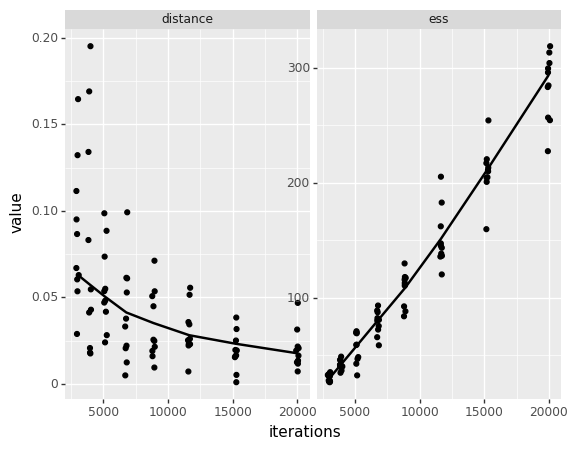

<ggplot: (349376973)>

In [8]:
low = np.log10(3000)
high = np.log10(20000)
test = run_replicates_annulus(10**np.linspace(low, high, 8), 10, test_haario_bardenet_acmc_on_annulus)

df = pd.melt(test, id_vars=['iterations', 'replicate'])
(ggplot(df,
        aes(x='iterations', y='value')) +
 geom_jitter(width=100) +
 geom_smooth(stat='smooth', se=False) +
 facet_wrap('variable', scales='free'))

Haario-Bardenet performs ok on the annulus problem: both the KLD and ESS behave as expected.

Example run.

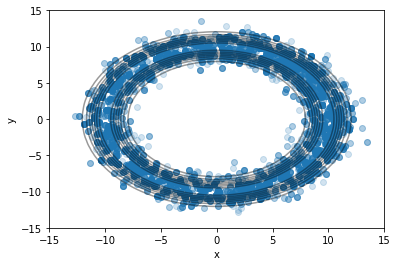

In [30]:
n_chains = 4
n_iterations = 4000
n_warmup = 2000

log_pdf = pints.toy.AnnulusLogPDF()
x0 = log_pdf.sample(n_chains)

# run model
controller = pints.MCMCController(
            log_pdf, n_chains, x0, sigma0=None, method=pints.HaarioBardenetACMC)
controller.set_max_iterations(n_iterations)
controller.set_log_to_screen(False)
chains = controller.run()
chains = np.vstack(chains[:, n_warmup:])

num_points = 100
x = np.linspace(-15, 15, num_points)
y = np.linspace(-15, 15, num_points)
X, Y = np.meshgrid(x, y)
Z = np.zeros(X.shape)
Z = np.exp([[log_pdf([i, j]) for i in x] for j in y])
plt.contour(X, Y, Z, colors='k', alpha=0.4)
plt.scatter(chains[:, 0], chains[:, 1], alpha=0.2)
plt.xlabel('x')
plt.ylabel('y')
plt.show()